# TeamHoWan - Spatial Profiler v1.0 Demo

##### Eden, Holly, Yuqian

[GitHub Repo](https://github.com/EdenWuyifan/Bigdata-Spring2023-TeamHoWan)

## 0. Topology
**Figure below shows the workflow of our spatial profiler. Our project mainly consists of five steps:**
1. Acquire datasets: Access datasets using Auctus datamart REST API.
2. Apply Semantic Processor(SP): Extract geo-related keywords from dataset titles and descriptions, and then pass them to our long-lat parser for further processing.
2. Apply Fuzzy Filter(fuzzy): Employ fuzzy matching to extract and categorize all potential spatial columns using pre-set, distinguishable keywords and context correlation matching. Examine sampled data to verify and improve the fuzzy-matched results.
4. Parse Candidate Column: Develop ad hoc parsers for each keyword type to eliminate noise and outliers, enhancing data accuracy and precision by prioritizing data types on a row-by-row basis.
5. Concatenate Standardized Column: Use the Geocoding Concatenator (GeoConcat) to transform high-priority spatial attributes in the parsed dataset into a single, standardized geo column.

Our entire project is designed with a modular structure and offers an interface for the datamart API. This allows users to seamlessly search for relevant datasets using keywords, identify spatial attributes within those datasets, and visualize the results. Our project empowers clients to perform real-time searches and quickly obtain the desired outcomes.
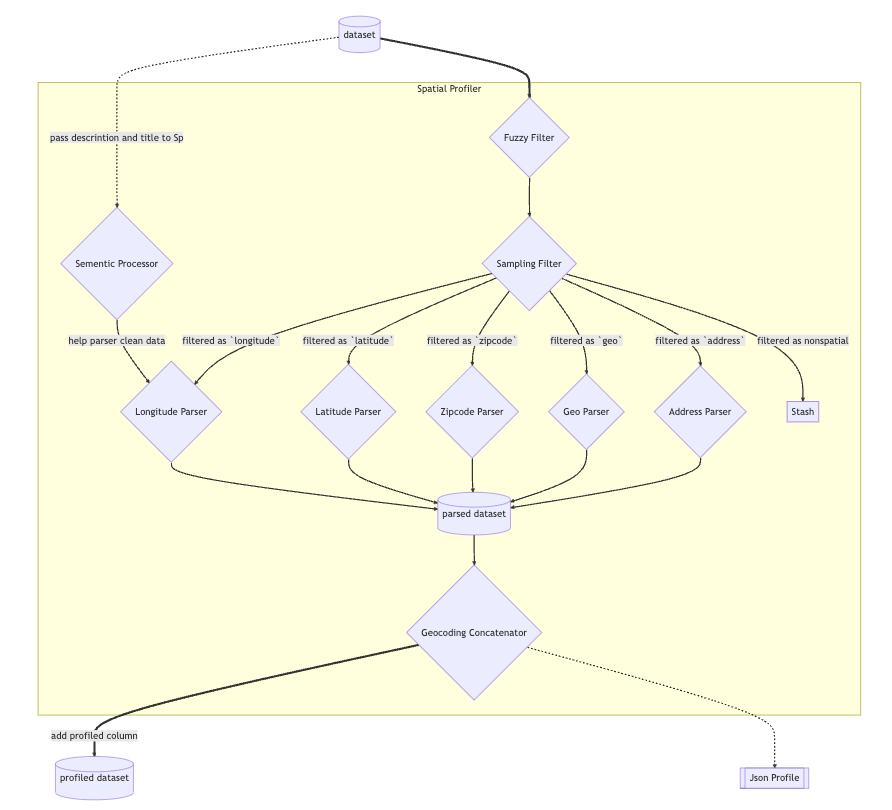

## 1. Demo

---
### 1.1 Setup
SpatialProfiler is our spatial profiler object, it need a Google map API key to init.

In [ ]:
import os
import sys
import random
sys.path.append('/home/ec2-user/Bigdata-Spring2023-TeamHoWan/')

from spatial_profiler.resource.datamart_API import DataMartAPI
from spatial_profiler.resource.profiler import SpatialProfiler
from spatial_profiler.resource.utils import create_map

from datamart_profiler.core import process_dataset

geo_key = os.getenv("THW_GEO_KEY")
profiler = SpatialProfiler(geo_key=geo_key)
dm = DataMartAPI()

---
### 1.2 Search Dataset with THW DataMart API Interface
This api interface is also developed for our app.

In [10]:
dm.search("New York, Spatial")
dm.next_page()
single_data = dm.get_single_result(9)
df=dm.download_as_dataframe(single_data).head(100)
df_test = df.copy(deep=True)

Name:
 Continuously Operating Reference Stations (CORS) Network
Description: 
NYSNet is a spatial reference network of continuously operating Global Positioning System (GPS) reference stations (CORS) throughout New York State that can be used for differential GPS applications. Depending on equipment and procedures, this network can provide users the ability to achieve centimeter positioning for surveying applications or sub-meter positioning for GIS mapping applications. Position information from this reference network can be utilized by using static data in post processing or by using the real time network (RTN).
Column Names:
['Designation', 'NGS Site ID  ', 'Site Number', 'Latitude', 'Longitude', 'Ellipsoid Height', 'Antenna Type', 'Position Source', 'Georeference']


---
### 1.3 Profiling Using TeamHoWan Spatial Profiler
It will output both profiled dataframe and a json file

In [11]:
%%time
df, json = profiler.profiling(df, single_data)

['New York']
CPU times: user 778 ms, sys: 0 ns, total: 778 ms
Wall time: 5.6 s


---
**The JSON file contians:**
1. "sp_restrain": Semantic Processor Restrains, a geojson file that tells the city/state restrains
2. "nb_rows": the number of rows
3. "candidate_columns": spatial column names and their categories filtered out by our Fuzzy Filter

In [12]:
json

'{"sp_restrain": {"type": "FeatureCollection", "features": [{"type": "Feature", "properties": {"accuracy": "APPROXIMATE", "address": "New York, NY, USA", "bbox": [-74.25908989999999, 40.4773991, -73.70027209999999, 40.9175771], "city": "New York", "confidence": 1, "country": "US", "lat": 40.7127753, "lng": -74.0059728, "ok": true, "place": "ChIJOwg_06VPwokRYv534QaPC8g", "quality": "locality", "raw": {"address_components": [{"long_name": "New York", "short_name": "New York", "types": ["locality", "political"]}, {"long_name": "New York", "short_name": "NY", "types": ["administrative_area_level_1", "political"]}, {"long_name": "United States", "short_name": "US", "types": ["country", "political"]}], "formatted_address": "New York, NY, USA", "geometry": {"bounds": {"northeast": {"lat": 40.9175771, "lng": -73.70027209999999}, "southwest": {"lat": 40.4773991, "lng": -74.25908989999999}}, "location": {"lat": 40.7127753, "lng": -74.0059728}, "location_type": "APPROXIMATE", "viewport": {"northe

---
**The profiled dataframe:**

In [14]:
df

Designation NGS Site ID   Site Number     Latitude     Longitude  \
0             Albany          NYAB          49  42.71357591  -73.81625043   
1      Central Islip          NYCI          16  40.76062136  -73.19771869   
2          Dansville          NYDV          33  42.54891485  -77.69794324   
3       Watkins Glen          NYWG          43  42.35105444  -76.87591679   
4         Plattsburg          NYPB           2  44.68071738  -73.45397371   
5        Indian Lake          NYIL          46  43.78267732  -74.27773944   
6           Newburgh          NYNB          14  41.49522385  -74.02554808   
7        Kingston NY          NYKT          71  41.93693661  -74.03117178   
8           Valhalla          NYVH           0  41.08228361   -73.8178127   
9         Friendship          NYFS          10   42.2046647  -78.14387197   
10           Hancock          NYHC          30  41.95832831  -75.29274343   
11              Rome          NYRM          25  43.17778575  -75.48718954   
12           Waverly          NYWV          44  42.01238894   -76.5215747   
13            Malone          NYML          27  44.87094025  -74.28815093   
14           Batavia          NYBT           7  42.98832235  -78.12232648   
15        Cobleskill          NYCS          47  42.66745458  -74.48637441   
16          Lowville          NYLV          26   43.7964565  -75.48543188   
17    North Syracuse          NYNS           5  43.11881908   -76.1416036   
18          Herkimer          NYHM          24  43.01841645  -74.99585662   
19        Monticello          NYMO          42  41.64600106  -74.66227253   
20             Danby          VTDA          52  43.34994877  -72.99523644   
21            Warsaw          NYWS          39  42.70086847  -78.12608202   
22       Fredonia NY          NYFD          17  42.42827379  -79.33964426   
23         Pittsford          NYPF          32  43.09319021  -77.52530905   
24        Bennington          VTBE          69  42.88250811  -73.19990231   
25        Middletown          NYMD          21  41.40681173  -74.44279945   
26        Morristown          NJMT          77   40.7964862  -74.48314979   
27         Riverhead          NYRH          19  40.92335801  -72.71404469   
28          Guilford          CTGU          37  41.28937285  -72.66790122   
29            Hudson          NYHS          22  42.25232215  -73.75754461   
30         Ray Brook          NYRB          40  44.30386745  -74.07835424   
31          Lockport          NYLP          35  43.16523741  -78.75371039   
32     Elizabethtown          NYET          28  44.20968082  -73.54051459   
33          Waterloo          NYWL           6  42.89867424  -76.85202844   
34          Saratoga          NYST          23  43.06159322  -73.80416949   
35    Coopers Plains          NYCP          11  42.18790139  -77.14342456   
36           Oneonta          NYON          13  42.44022641  -75.11180787   
37        Binghamton          NYBH          12  42.10974928  -75.82741756   
38              NJI2          NJI2          79  40.74147376  -74.17770168   
39         Salamanca          NYSM          34  42.19205045  -78.74735151   
40        Hailesboro          NYHL          45  44.30876323  -75.44935818   
41         Sheffield          MASH          15  42.14048716  -73.36418431   
42       Garden City          NYGC          60  40.73465566  -73.60027077   
43        Middlebury          VTMI          70  43.99861814  -73.15260563   
44            Darien          CTDA          50  41.06585273  -73.50720618   
45           Potsdam          NYPD           3  44.65251647  -75.04180698   
46        Piscataway          NJTP          41  40.54051153  -74.46781531   
47       Lake Carmel          NYLC          20  41.48107676   -73.6514914   
48         Watertown          NYWT           4  44.02823837  -75.92109689   
49      Hudson Falls          NYHF           1  43.31767437  -73.56871377   
50          Cortland          NYCL          31  42.58436313   -76.2113313   
51  N

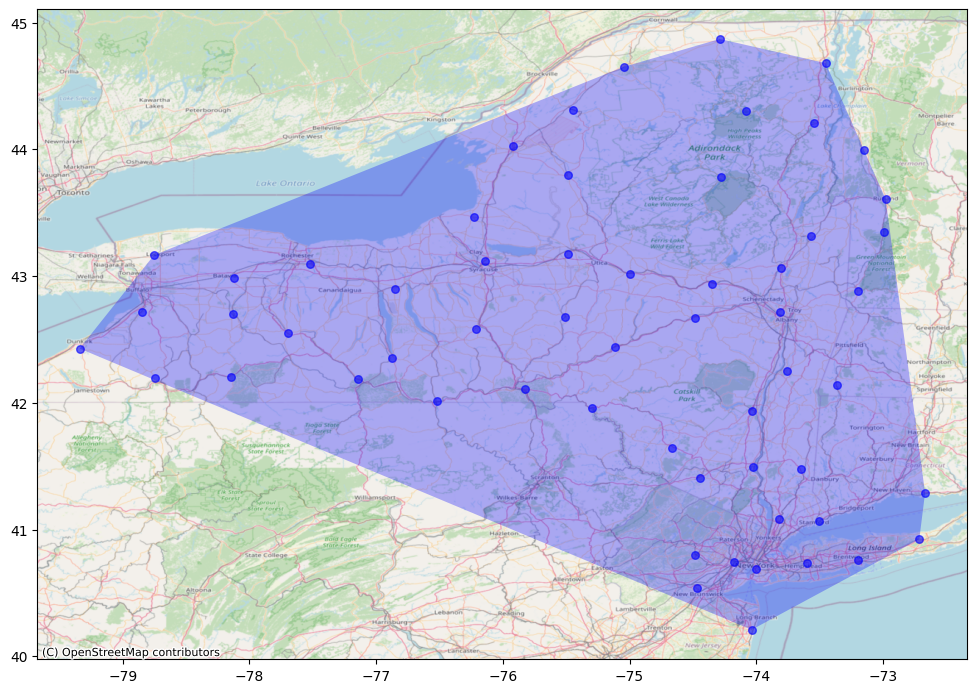

In [15]:
create_map(df['thw_parsed_long'], df['thw_parsed_lat'])

---
### 1.4 Profiling Using datamart profiler

In [16]:
%%time
process_dataset(df_test, geo_data=True)

CPU times: user 175 ms, sys: 20.1 ms, total: 195 ms
Wall time: 646 ms


{'nb_rows': 58,
 'nb_profiled_rows': 58,
 'nb_columns': 9,
 'columns': [{'name': 'Designation',
   'structural_type': 'http://schema.org/Text',
   'semantic_types': [],
   'num_distinct_values': 58},
  {'name': 'NGS Site ID  ',
   'structural_type': 'http://schema.org/Text',
   'semantic_types': [],
   'num_distinct_values': 58},
  {'name': 'Site Number',
   'structural_type': 'http://schema.org/Integer',
   'semantic_types': [],
   'unclean_values_ratio': 0.0,
   'num_distinct_values': 58,
   'mean': 31.482758620689655,
   'stddev': 21.037930751883525,
   'coverage': [{'range': {'gte': 1.0, 'lte': 23.0}},
    {'range': {'gte': 26.0, 'lte': 50.0}},
    {'range': {'gte': 60.0, 'lte': 79.0}}]},
  {'name': 'Latitude',
   'structural_type': 'http://schema.org/Float',
   'semantic_types': ['http://schema.org/latitude'],
   'unclean_values_ratio': 0.0,
   'mean': 42.52429140241378,
   'stddev': 1.1525523805053883,
   'coverage': [{'range': {'gte': 40.2093388, 'lte': 41.64600106}},
    {'rang

---
## 2. Results

### 2.1 Synthesis of Environmental Mercury Loads in New York State (1969-2017)

In [4]:
dm.search("Synthesis of Environmental Mercury Loads in New York State (1969-2017)")
dm.next_page()
single_data_mercury = dm.get_single_result(1)
df_mercury=dm.download_as_dataframe(single_data_mercury).head(100)
df_mercury_profiled, df_mercury_profiled_json = profiler.profiling(df_mercury, single_data_mercury)

Name:
 Synthesis of Environmental Mercury Loads in New York State (1969-2017): Sites
Description: 
This dataset includes information from a statewide synthesis effort, involving the compilation, analysis, and synthesis of existing data on environmental mercury (Hg) concentrations and loads in New York State, with an emphasis on Hg data collected during recent NYSERDA-sponsored monitoring and research efforts. Compiling existing mercury data is a vital step to understanding the broad spatial and temporal patterns of mercury across the landscape. This dataset includes information about the locations in which samples were collected and is one of eight datasets from the statewide synthesis database.  

The New York State Energy Research and Development Authority (NYSERDA) offers objective information and analysis, innovative programs, technical expertise, and support to help New Yorkers increase energy efficiency, save money, use renewable energy, and accelerate economic growth. reduce rel

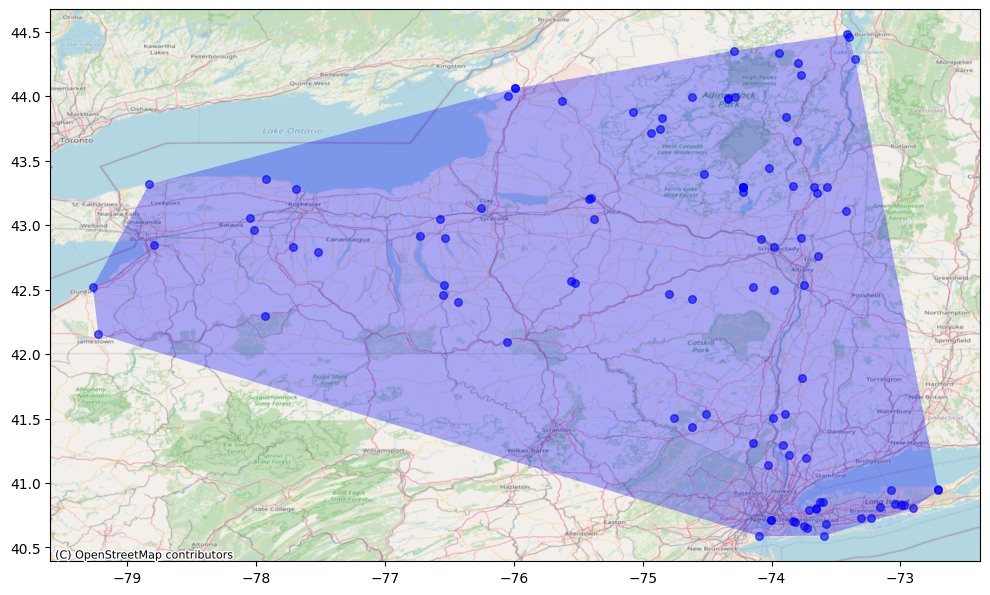

In [5]:
create_map(df_mercury_profiled['thw_parsed_long'], df_mercury_profiled['thw_parsed_lat'])

##### TeamHoWan Profiled: Synthesis of Environmental Mercury Loads in New York State (1969-2017)

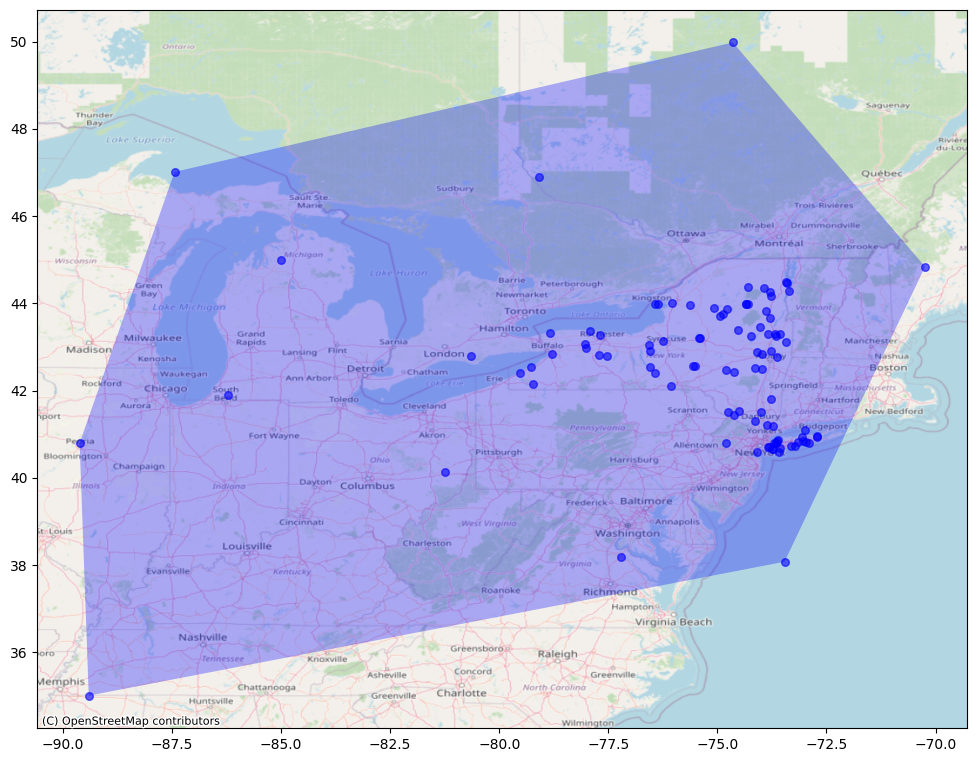

In [11]:
from spatial_profiler.resource.utils import convert_to_float

# df_mercury['Longitude'] = df_mercury['Longitude'].apply(lambda x: x if x != "" else random.uniform(-90, -70))
# df_mercury['Latitude'] = df_mercury['Latitude'].apply(lambda x: x if x != "" else random.uniform(35, 50))
df_mercury_vanilla = df_mercury.loc[df_mercury['Longitude'] != ""]
df_mercury_vanilla = df_mercury_vanilla.loc[df_mercury_vanilla['Latitude'] != ""]
create_map(df_mercury_vanilla['Longitude'], df_mercury_vanilla['Latitude'])

##### Without Profiling: Synthesis of Environmental Mercury Loads in New York State (1969-2017)

### 2.2 GreenThumb Garden Info

In [17]:
dm.search("GreenThumb Garden Info")
dm.next_page()
single_data_garden = dm.get_single_result(0)
df_garden=dm.download_as_dataframe(single_data_garden).head(100)
df_garden_profiled, df_garden_profiled_json = profiler.profiling(df_garden, single_data_garden)

Name:
 GreenThumb Garden Info
Description: 
GreenThumb provides programming and material support to over 550 community gardens in New York City. The data contains garden information and is part of the GreenThumb Gardens Data Collection. 

Data Dictionary: https://docs.google.com/spreadsheets/d/1ItvGzNG8O_Yj97Tf6am4T-QyhnxP-BeIRjm7ZaUeAxs/edit#gid=33327664
Column Names:
['assemblydist', 'borough', 'communityboard', 'congressionaldist', 'coundist', 'gardenname', 'juris', 'multipolygon', 'openhrsf', 'openhrsm', 'openhrssa', 'openhrssu', 'openhrsth', 'openhrstu', 'openhrsw', 'parksid', 'policeprecinct', 'statesenatedist', 'status', 'zipcode']
['New York City']


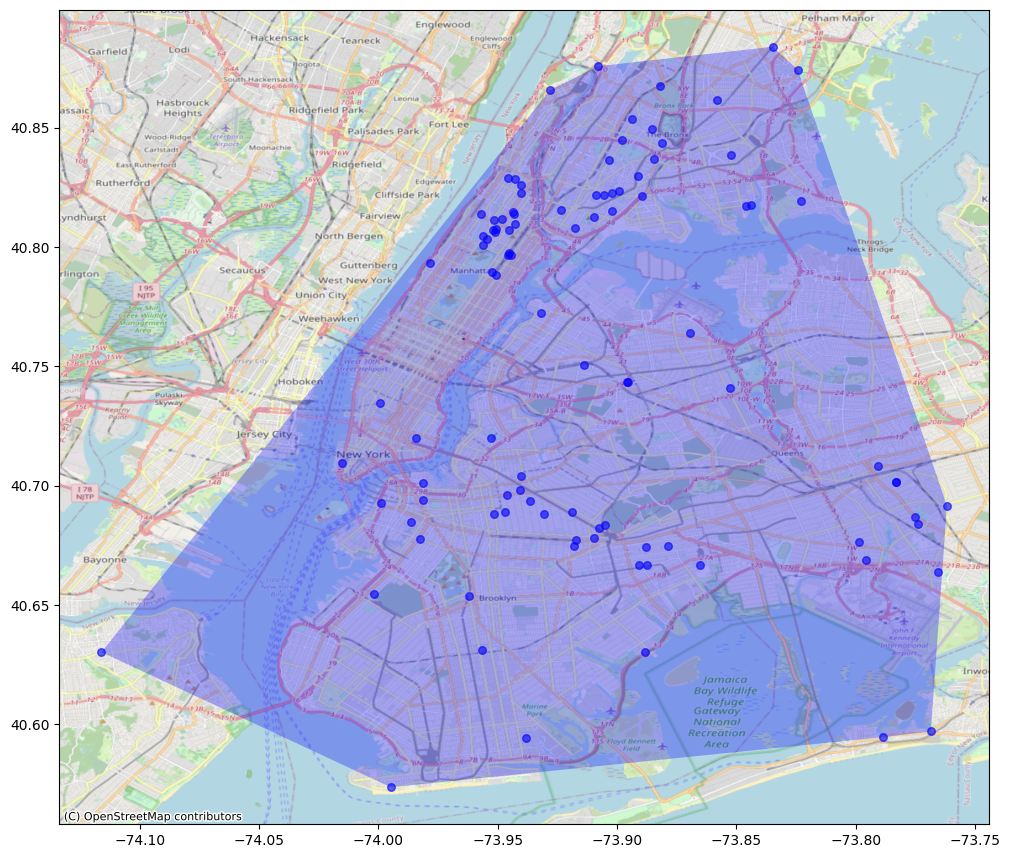

In [18]:
create_map(df_garden_profiled['thw_parsed_long'], df_garden_profiled['thw_parsed_lat'])

##### TeamHoWan Profiled: GreenThumb Garden Info

In [19]:
df_garden_profiled_json

'{"sp_restrain": {"type": "FeatureCollection", "features": [{"type": "Feature", "properties": {"accuracy": "APPROXIMATE", "address": "New York, NY, USA", "bbox": [-74.25908989999999, 40.4773991, -73.70027209999999, 40.9175771], "city": "New York", "confidence": 1, "country": "US", "lat": 40.7127753, "lng": -74.0059728, "ok": true, "place": "ChIJOwg_06VPwokRYv534QaPC8g", "quality": "locality", "raw": {"address_components": [{"long_name": "New York", "short_name": "New York", "types": ["locality", "political"]}, {"long_name": "New York", "short_name": "NY", "types": ["administrative_area_level_1", "political"]}, {"long_name": "United States", "short_name": "US", "types": ["country", "political"]}], "formatted_address": "New York, NY, USA", "geometry": {"bounds": {"northeast": {"lat": 40.9175771, "lng": -73.70027209999999}, "southwest": {"lat": 40.4773991, "lng": -74.25908989999999}}, "location": {"lat": 40.7127753, "lng": -74.0059728}, "location_type": "APPROXIMATE", "viewport": {"northe

In [20]:
df_garden

assemblydist borough communityboard congressionaldist coundist  \
0            59       B            318                 8       46   
1            60       B            305                 8       42   
2            68       M            111                13        8   
3            57       B            303                 8       36   
4            31       Q            414                 5       31   
..          ...     ...            ...               ...      ...   
95           85       X            203                14       17   
96           54       B            304                 7       34   
97           78       X            206                15       15   
98           71       M            110                13        9   
99           65       M            103                10        1   

                                           gardenname juris  \
0               Canarsie Neighborhood Farm and Garden   DPR   
1                              Dumont Garden of Green   DPR   
2                                      Villa Santurce   HPD   
3     Greene Avenue United Neighbors Community Garden   DPR   
4                      Rockaway Youth Community Power   DPR   
..                                                ...   ...   
95                              Bronx Sunshine Garden   DPR   
96                         Madison Street Association  NYRP   
97                                    Garden Of Youth   PRI   
98  Robert L. Clinkscales Playground and Community...   DPR   
99                               Siempre Verde Garden   DPR   

                                         multipolygon                openhrsf  \
0   MULTIPOLYGON (((-73.88841827520534 40.63010449...                           
1   MULTIPOLYGON (((-73.89075587925667 40.66668478...                           
2   MULTIPOLYGON (((-73.94575583040398 40.79661589...                           
3   MULTIPOLYGON (((-73.95132094419853 40.68829183...      12:00 pm - 3:00 pm   
4   MULTIPOLYGON (((-73.78879327802805 40.59468188...          10:00a - 8:00p   
..                                                ...                     ...   
95  MULTIPOLYGON (((-73.88480167715466 40.83680163...          Noon to 5 p.m.   
96  MULTIPOLYGON (((-73.9190191064913 40.688886946...                           
97  MULTIPOLYGON (((-73.88544919922825 40.84931282...  11:00 a.m. - 5:00 p.m.   
98  MULTIPOLYGON (((-73.94011007869956 40.82254521...          8:00a - 10:00a   
99  MULTIPOLYGON (((-73.98403031455335 40.71983685...                           

                 openhrsm  ... policeprecinct statesenatedist          status  \
0                          ...             69              19          Active   
1   9:00 a.m. - 6:00 p.m.  ...             75              19          Active   
2                          ...             23              29  Not GreenThumb   
3                  Closed  ...             79              25          Active   
4          10:00a - 8:00p  ...            100              10          Active   
..                    ...  ...            ...             ...             ...   
95         10 a.m. 2 p.m.  ...             42              32          Active   
96                         ...             83              18          Active   
97  1:00 p.m. - 5:00 p.m.  ...             48              32          Active   
98         8:00a - 10:00a  ...             32              30          Active   
99                         ...              7              27          Active   

   zipcode TeamHoWan_address            TeamHoWan_multipolygon_geojson  \
0    11236                 B  (-73.88860978195389, 40.629987678494295)   
1    11207                 B  (-73.89094340682259, 40.666687616030835)   
2    10029                 M  (-73.94556139686087, 40.796690489286604)   
3    11216                 B    (-73.9512863375388, 40.68815361338246)   
4    11692                 Q    (-73.78852544487026, 40.5945479749168)   
..     ...               ..

### 2.3 City of Edmonton - Neighbourhoods

In [2]:
dm.search("City of Edmonton - Neighbourhoods")
dm.next_page()
single_data_edmonton = dm.get_single_result(0)
df_edmonton=dm.download_as_dataframe(single_data_edmonton).head(100)
df_edmonton_profiled, df_edmonton_profiled_json = profiler.profiling(df_edmonton, single_data_edmonton)

Name:
 City of Edmonton - Neighbourhoods
Description: 
List of current neighbourhoods and their unique identifier number.  Included are both residential and industrial neighbourhoods.
Column Names:
['Neighbourhood Name', 'Neighbourhood Number', 'Descriptive Name', 'Description', 'Effective Start Date', 'Effective End Date', 'Geometry Multipolygon', 'Planning District']
['Edmonton']


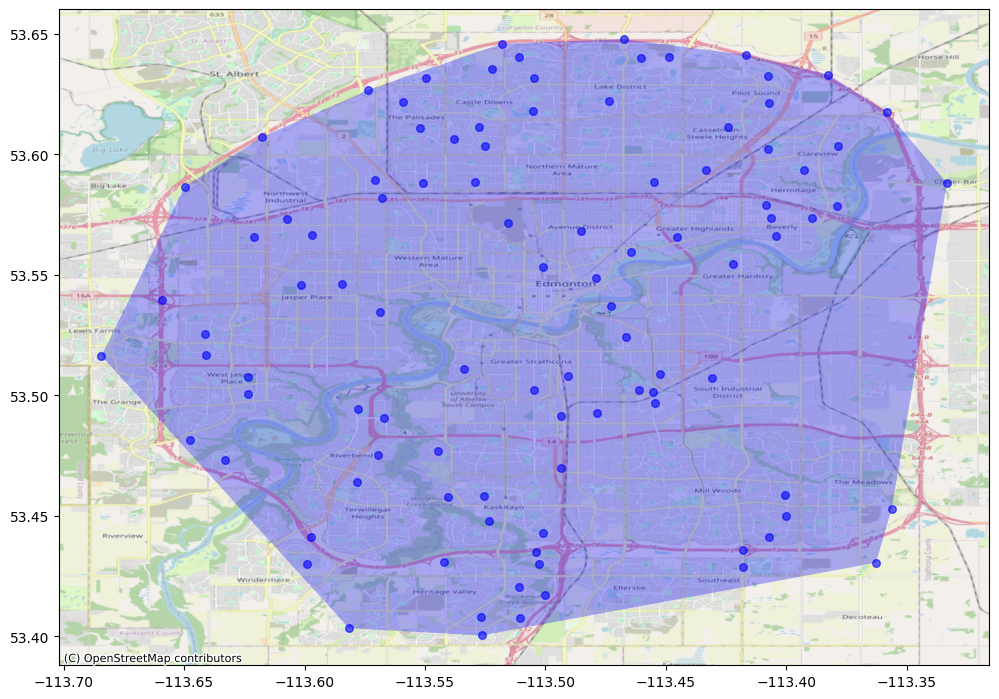

In [3]:
create_map(df_edmonton_profiled['thw_parsed_long'], df_edmonton_profiled['thw_parsed_lat'])

##### TeamHoWan Profiled: City of Edmonton - Neighbourhoods

### 2.4 NYC DOT Pedestrian Plazas

In [8]:
dm.search("NYC DOT Pedestrian Plazas")
dm.next_page()
single_data_plaza = dm.get_single_result(0)
df_plaza=dm.download_as_dataframe(single_data_plaza).head(100)
df_plaza_profiled, df_plaza_profiled_json = profiler.profiling(df_plaza, single_data_plaza)

Name:
 NYC DOT Pedestrian Plazas
Description: 
A shapefile with all DOT pedestrian plaza locations across New York City.
Column Names:
['the_geom', 'OBJECTID', 'BoroCD', 'AssemDist', 'CounDist', 'CongDist', 'StSenDist', 'PlazaName', 'OnStreet', 'FromStreet', 'ToStreet', 'Partner', 'BoroCode', 'BoroName', 'FEMAFldz', 'FEMAFldT', 'HrcEvac', 'Shape_Leng', 'Shape_Area']
['New York City']


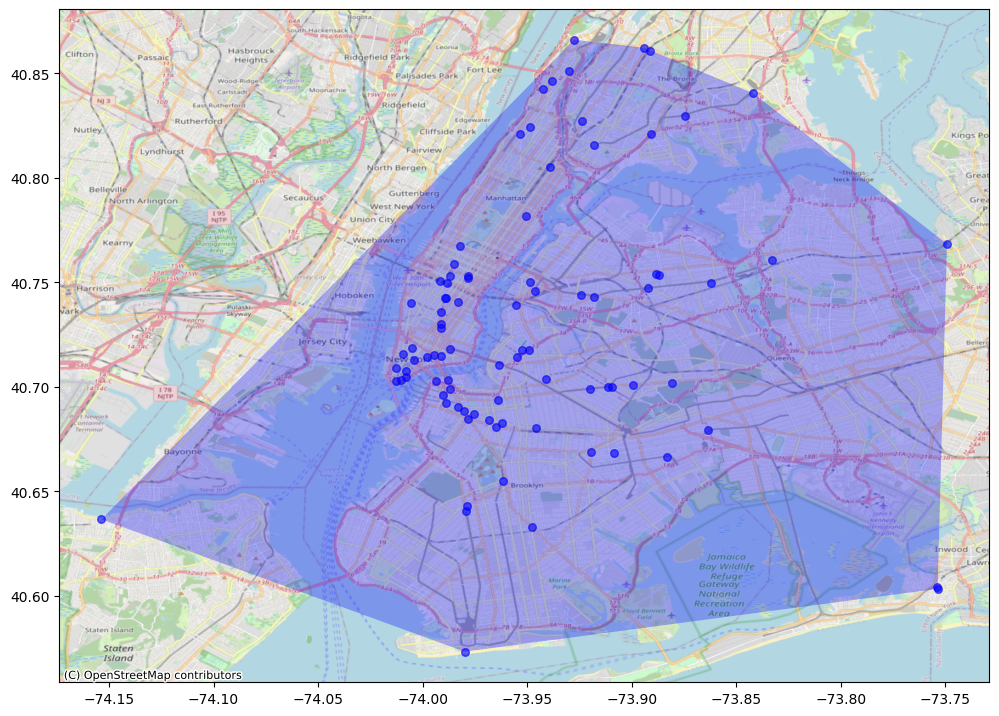

In [9]:
create_map(df_plaza_profiled['thw_parsed_long'], df_plaza_profiled['thw_parsed_lat'])

##### TeamHoWan Profiled: NYC DOT Pedestrian Plazas

### 2.5 Medical Marijuana Regions Current Statewide Health Monthly

In [10]:
dm.search("Medical Marijuana Regions Current Statewide Health Monthly")
dm.next_page()
single_data_marijuana = dm.get_single_result(0)
df_marijuana=dm.download_as_dataframe(single_data_marijuana).head(100)
df_marijuana_profiled, df_marijuana_profiled_json = profiler.profiling(df_marijuana, single_data_marijuana)

Name:
 Medical Marijuana  Regions Current Statewide Health Monthly
Description: 
Medical Marijuana  Regions
Column Names:
['The Geom', 'District', 'Shape Area', 'Shape Len']
[]
[Semantic Processor] Cannot get helpful info out of descriptions!


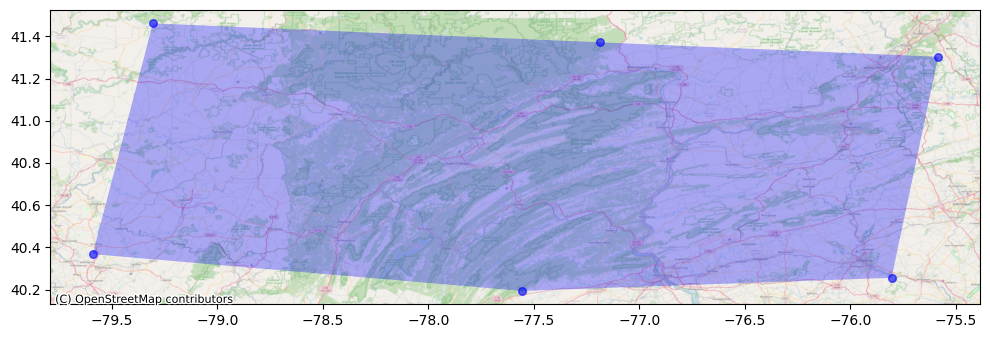

In [11]:
create_map(df_marijuana_profiled['thw_parsed_long'], df_marijuana_profiled['thw_parsed_lat'])

##### TeamHoWan Profiled: Medical Marijuana Regions Current Statewide Health Monthly